In [5]:
from IPython.display import display, HTML
import pandas as pd
import pandas as pd
import datetime



display(HTML("<style>div.output_scroll { height: 10em; }</style>"))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## project: medallions
- goal: medallion value based on net revenue
- analyze the following:
    - number of rides per day
    - average spent per ride
    - total ride revenue collected per day 
    - average number of rides per medallion


# **medallion prices**

In [3]:

# Load spreadsheet
xl = pd.ExcelFile('february_2023_medallion_price_list.xls')

# Print the names of the spreadsheets stored in this excel file
print(xl.sheet_names)


['January 2012', 'November 2011', 'October 2011', 'February 2023', 'January 2023', 'December 2022', 'November 2022', 'October 2022', 'September 2022', 'August 2022', 'July 2022', 'June 2022', 'May 2022', 'April 2022', 'March 2022', 'February 2022', 'January 2022', 'December 2021', 'November 2021', 'October 2021', 'September 2021', 'August 2021', 'July 2021', 'June 2021', 'May 2021', 'April 2021', 'March 2021', 'February 2021', 'January 2021', 'December 2020', 'November 2020', 'October 2020', 'September 2020', 'August 2020', 'Sheet1', 'July 2020', 'June 2020', 'March 2020', 'February 2020', 'January 2020', 'December 2019', 'Novenber 2019', 'October 2019', 'September 2019', 'August 2019', 'July 2019', 'June 2019', 'May 2019', 'April 2019', 'March 2019', 'February 2019', 'January 2019', 'December 2018', 'November 2018', 'October 2018', 'September 2018', 'August 2018', 'July 2018', 'June 2018', 'May 2018', 'April 2018', 'March 2018', 'February 2018', 'January 2018', 'December 2017', 'Novem

In [6]:
# filter for target dates

# Get all sheet names
all_sheet_names = xl.sheet_names

# Filter sheet names
filtered_sheet_names = []
for sheet_name in all_sheet_names:
    try:
        if datetime.datetime.strptime(sheet_name, '%B %Y') >= datetime.datetime(2017, 3, 1):
            filtered_sheet_names.append(sheet_name)
    except ValueError:
        # This will catch any sheet names that can't be converted to a datetime
        pass

# Remove any irrelevant sheet names
filtered_sheet_names = [name for name in filtered_sheet_names if name != 'Sheet1']

print(filtered_sheet_names)


['February 2023', 'January 2023', 'December 2022', 'November 2022', 'October 2022', 'September 2022', 'August 2022', 'July 2022', 'June 2022', 'May 2022', 'April 2022', 'March 2022', 'February 2022', 'January 2022', 'December 2021', 'November 2021', 'October 2021', 'September 2021', 'August 2021', 'July 2021', 'June 2021', 'May 2021', 'April 2021', 'March 2021', 'February 2021', 'January 2021', 'December 2020', 'November 2020', 'October 2020', 'September 2020', 'August 2020', 'July 2020', 'June 2020', 'March 2020', 'February 2020', 'January 2020', 'December 2019', 'October 2019', 'September 2019', 'August 2019', 'July 2019', 'June 2019', 'May 2019', 'April 2019', 'March 2019', 'February 2019', 'January 2019', 'December 2018', 'November 2018', 'October 2018', 'September 2018', 'August 2018', 'July 2018', 'June 2018', 'May 2018', 'April 2018', 'March 2018', 'February 2018', 'January 2018', 'December 2017', 'November 2017', 'October 2017', 'September 2017', 'August 2017', 'July 2017', 'Ju

In [7]:
# Now we load data from the filtered sheets and set the first row as the column names
dataframes = {}
for sheet in filtered_sheet_names:
    df = pd.read_excel(xl, sheet_name=sheet)
    df.columns = df.iloc[0]
    df = df.iloc[1:]
    dataframes[sheet] = df

# dataframes now is a dict with keys being the sheet name and values being the corresponding DataFrame


**reset column index**

In [8]:
dataframes = {}

# Loop through the sheets
for sheet in filtered_sheet_names:
    # Use the first row (index 2) as the column names
    df = pd.read_excel(xl, sheet_name=sheet, header=2)
    
    # Store the dataframes in the dictionary with sheet name as the key
    dataframes[sheet] = df


In [10]:
dataframes['July 2022']

,Medallion Classification,Prices,Notes,Number of Medallions
0,Wheelchair Accessible,135000,Foreclosure,1
1,NaN,115000,Foreclosure,1
2,Alternative Fuel,0,Individual to LLC,1
3,Unrestricted,280000,NaN,2
4,NaN,265000,NaN,2
5,NaN,200000,Foreclosure,1
6,NaN,190000,Foreclosure,1
7,NaN,185000,Foreclosure,1
8,NaN,170000,Foreclosure,1
9,NaN,170000,Foreclosure,1


**filter for unrestricted sales**

In [11]:
for sheet, df in dataframes.items():
    medallion_class = df['Medallion Classification'].str.strip().str.lower()
    prices = df['Prices'].str.strip().str.lower()

    if 'unrestricted' in medallion_class.values and 'stock transfers' in prices.values:
        print(f"Filtering {sheet}")
        start = medallion_class[medallion_class == 'unrestricted'].index[0]
        end = prices[prices == 'stock transfers'].index[0]
        df = df.loc[start:end-1]
        dataframes[sheet] = df
    else:
        print(f"No filtering for {sheet}")


Filtering February 2023
Filtering January 2023
Filtering December 2022
Filtering November 2022
Filtering October 2022
Filtering September 2022
Filtering August 2022
Filtering July 2022
Filtering June 2022
Filtering May 2022
Filtering April 2022
Filtering March 2022
Filtering February 2022
Filtering January 2022
Filtering December 2021
Filtering November 2021
Filtering October 2021
Filtering September 2021
Filtering August 2021
Filtering July 2021
Filtering June 2021
Filtering May 2021
Filtering April 2021
Filtering March 2021
Filtering February 2021
Filtering January 2021
Filtering December 2020
Filtering November 2020
Filtering October 2020
Filtering September 2020
Filtering August 2020
Filtering July 2020
Filtering June 2020
Filtering March 2020
Filtering February 2020
Filtering January 2020
Filtering December 2019
Filtering October 2019
Filtering September 2019
Filtering August 2019
Filtering July 2019
Filtering June 2019
Filtering May 2019
Filtering April 2019
Filtering March 2019


**remove prices == 0 and set Classification to Unrestricted**

In [12]:
for sheet, df in dataframes.items():
    df = df.copy()
    df['Medallion Classification'] = 'Unrestricted'
    df = df.loc[df['Prices'] != 0]
    df = df.dropna(subset=['Prices'])
    dataframes[sheet] = df


**Change Prices Column to Total Price, and create new column called Price Each by dividing Total Price by Number of Medallians, Change NaN to No Notes**



In [13]:
for sheet, df in dataframes.items():
    df = df.copy()
    df.rename(columns={"Prices": "Total Price"}, inplace=True)
    df['Price Each'] = df['Total Price'] / df['Number of Medallions']
    df = df[['Medallion Classification', 'Total Price', 'Number of Medallions', 'Price Each', 'Notes']]
    
    # Replace NaN values and empty strings in 'Notes' column with 'No Notes'
    df['Notes'] = df['Notes'].fillna('No Notes').replace(' ', 'No Notes')
    
    # Sort the dataframe by 'Price Each' in descending order
    df = df.sort_values('Price Each', ascending=False)
    
    dataframes[sheet] = df


**count all types**

In [14]:
all_data = pd.concat(dataframes.values())
notes_counts = all_data['Notes'].value_counts()

# Convert to DataFrame
notes_counts_df = notes_counts.reset_index()
notes_counts_df.columns = ['Note', 'Count']


In [30]:
all_data.head()

,Medallion Classification,Total Price,Number of Medallions,Price Each,Notes
3,Unrestricted,350000,2,175000.0,No Notes
11,Unrestricted,165000,1,165000.0,Foreclosure
13,Unrestricted,160000,1,160000.0,No Notes
15,Unrestricted,155000,1,155000.0,No Notes
16,Unrestricted,150000,1,150000.0,Foreclosure


In [31]:
# Calculate total count of notes
total_count = notes_counts_df['Count'].sum()

# Create new column 'Percentage' by dividing 'Count' by total count and multiplying by 100
notes_counts_df['Percentage'] = (notes_counts_df['Count'] / total_count) * 100


In [32]:
notes_counts_df

,Note,Count,Percentage
0,Foreclosure,1827,64.217926
1,No Notes,826,29.033392
2,Estate,116,4.077329
3,Bankruptcy,63,2.214411
4,Partnership Split,7,0.246046
5,Family,3,0.105448
6,Individual to Corp,1,0.035149
7,"Individual to LLC, Adding 1% member",1,0.035149
8,0.5,1,0.035149


**remove non-relevant transaction types**

In [24]:
for sheet, df in dataframes.items():
    # Exclude rows where 'Notes' is 'Estate' or 'Family'
    df = df[~df['Notes'].isin(['Estate', 'Family','Individual to LLC, Adding 1% member','Partnership Split','Individual to Corp'])]

    dataframes[sheet] = df


In [22]:
dataframes['July 2022']

,Medallion Classification,Total Price,Number of Medallions,Price Each,Notes
5,Unrestricted,200000,1,200000.0,Foreclosure
6,Unrestricted,190000,1,190000.0,Foreclosure
7,Unrestricted,185000,1,185000.0,Foreclosure
11,Unrestricted,170000,1,170000.0,Foreclosure
8,Unrestricted,170000,1,170000.0,Foreclosure
9,Unrestricted,170000,1,170000.0,Foreclosure
10,Unrestricted,170000,1,170000.0,Foreclosure
12,Unrestricted,170000,1,170000.0,Foreclosure
15,Unrestricted,145000,1,145000.0,Foreclosure
16,Unrestricted,145000,1,145000.0,Foreclosure


**summarize data in new df**

In [25]:
summary_data = []

for sheet, df in dataframes.items():
    # Combine month and year from sheet name and convert to datetime
    date = pd.to_datetime(" ".join(sheet.split(" ")))

    # Calculate statistics
    max_price = df['Price Each'].max()
    min_price = df['Price Each'].min()
    avg_price = df['Price Each'].mean()
    std_price = df['Price Each'].std()
    total_medallions_sold = df['Number of Medallions'].sum()
    total_spent = df['Total Price'].sum()

    # Count the occurrences of different note types
    foreclosure_count = df['Notes'].str.contains('Foreclosure').sum()
    no_notes = df['Notes'].str.contains('No Notes').sum()
    bankruptcy = df['Notes'].str.contains('Bankruptcy').sum()


    # Append a new record to the summary data
    summary_data.append({
        'Date': date,
        'Max Price': max_price,
        'Min Price': min_price,
        'Average Price': avg_price,
        'Std Price': std_price,
        'Total Medallions Sold': total_medallions_sold,
        'Total Spent': total_spent,
        'Foreclosure Count': foreclosure_count,
        'No Notes': no_notes,
        'Bankruptcy': bankruptcy,
    })

# Convert the list of dictionaries into a DataFrame
summary_df = pd.DataFrame(summary_data)

# Set 'Date' as index
summary_df = summary_df.set_index('Date')


In [418]:
summary_df.dtypes

Max Price                float64
Min Price                float64
Average Price            float64
Std Price                float64
Total Medallions Sold      int64
Total Spent              float64
Foreclosure Count          int64
No Notes                   int64
Family Count               int64
dtype: object

In [26]:
summary_df

,Max Price,Min Price,Average Price,Std Price,Total Medallions Sold,Total Spent,Foreclosure Count,No Notes,Bankruptcy
Date,,,,,,,,,
2023-02-01,175000.000,120000.00,131272.727273,13750.619821,41,5387000.00,19,14,0
2023-01-01,200000.000,110262.60,138428.436977,23631.284468,45,6197422.79,27,16,0
2022-12-01,190000.000,120000.00,142615.384615,23191.510383,26,3708000.00,11,15,0
2022-11-01,210000.000,35000.00,156923.076923,36976.439594,42,6377500.00,20,19,0
2022-10-01,220000.000,75000.00,146363.636364,28375.954701,23,3295000.00,14,8,0
2022-09-01,190000.000,130000.00,157500.000000,20541.286339,47,7380000.00,26,20,0
2022-08-01,200000.000,115000.00,163608.965909,25760.765866,97,16017589.00,63,25,0
2022-07-01,200000.000,125000.00,149166.666667,17882.719778,35,5195000.00,22,11,0
2022-06-01,190000.000,90000.00,146906.862745,19462.928762,111,16332000.00,57,45,0


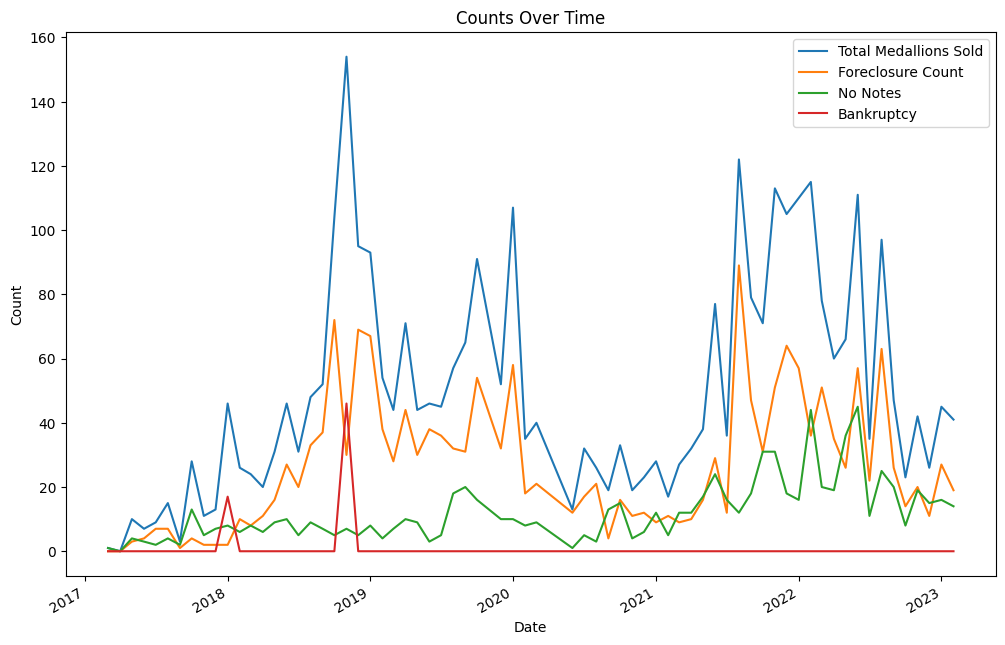

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
summary_df['Total Medallions Sold'].plot(label='Total Medallions Sold')
summary_df['Foreclosure Count'].plot(label='Foreclosure Count')
summary_df['No Notes'].plot(label='No Notes')
summary_df['Bankruptcy'].plot(label='Bankruptcy')
plt.title('Counts Over Time')
plt.ylabel('Count')
plt.xlabel('Date')
plt.legend()
plt.show()


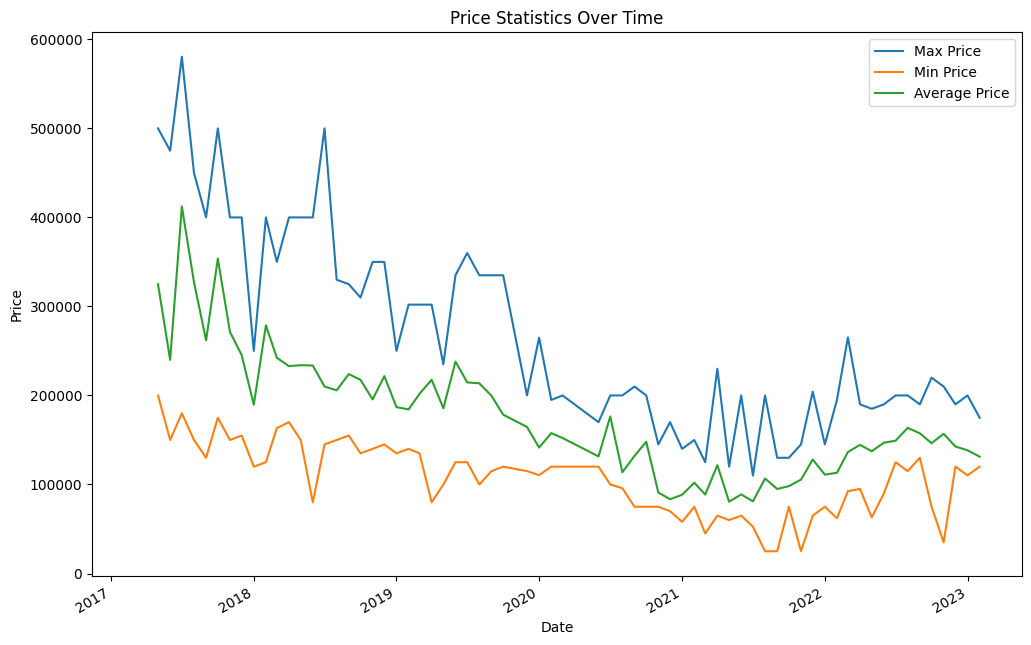

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
summary_df['Max Price'].plot(label='Max Price')
summary_df['Min Price'].plot(label='Min Price')
summary_df['Average Price'].plot(label='Average Price')
plt.title('Price Statistics Over Time')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()


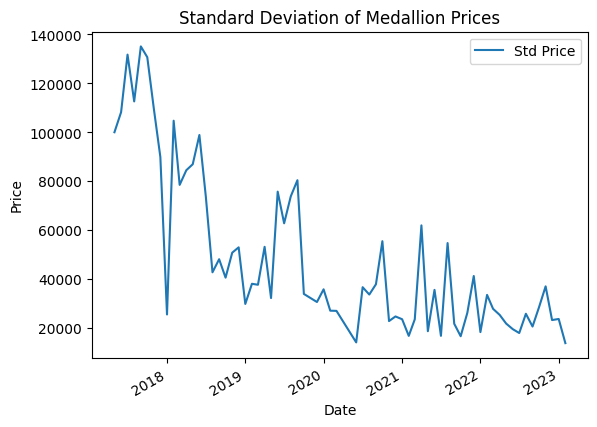

In [29]:
summary_df['Std Price'].plot(label='Std Price')
plt.title('Standard Deviation of Medallion Prices')
plt.ylabel('Price')
plt.xlabel('Date') 

plt.legend()
plt.show()
